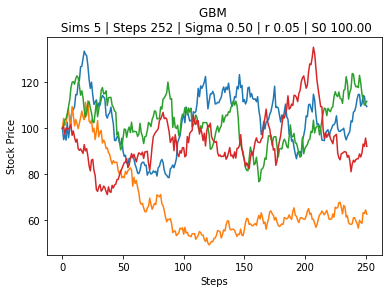

5.034827617962764


<Figure size 432x288 with 0 Axes>

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 30 20:01:46 2019

@author: Martin Musya
"""

import numpy as np
import matplotlib.pyplot as plt



#from matplotlib import pyplot as plt

#pip install numpy as np
#pip.install matplotlib.pyplot as plt

S0 = 100  #initial stock price
K = 100  #strike price
r = 0.05  #risk-free interest rate
sigma = 0.50  #volatility in market
T = 1  #time in years
N = 252  #number of steps within each simulation
deltat = T / N  #time step
nsim = 5  #number of simulations
discount_factor = np.exp(-r * T)  #discount factor

S = np.zeros([nsim, N])
t = range(0, N, 1)

for y in range(0, nsim - 1):
    S[y, 0] = S0
    for x in range(0, N - 1):
        S[y, x +
          1] = S[y, x] * (1 + r * deltat + sigma * np.sqrt(deltat) *\
                          np.random.normal(0, 1))
    plt.plot(t, S[y])

plt.title(
    'GBM \n Sims %d | Steps %d | Sigma %.2f | r %.2f | S0 %.2f' % (nsim, N, sigma, r, S0))
plt.xlabel('Steps')
plt.ylabel('Stock Price')
#plt.ylim(60,120)
plt.show()

#plt.plot([1,2,3,4,5,6,7,8,9])
#plt.show()
plt.savefig('GBM.png')

C = np.zeros((nsim - 1, 1), dtype=np.float16)
for y in range(0, nsim - 1):
    C[y] = np.maximum(S[y, N - 1] - K, 0)

CallPayoffAverage = np.average(C)
CallPayoff = discount_factor * CallPayoffAverage
print(CallPayoff)

